In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plotgrid(gridarr,fsize=4):
    ''' ensure that plot comes out nicely formatted '''
    n = gridarr.shape[0]
    f,p=plt.subplots(figsize=[fsize]*2)
    p.imshow(gridarr,cmap='gray')
    ticks=np.arange(0,n+1)-0.5
    lims=[ticks.min(),ticks.max()]
    p.set_xticks(ticks,minor=True)
    p.set_yticks(ticks,minor=True)
    p.grid(b=True,which='minor')
#     p.set_ylim(lims)
#     p.set_xlim(lims)
    return f,p

def canGoInDir(arr,coord,direction):
    ''' 
    create a map that says whether a point can go in a given direction. 
        alternative to making a tree in the typical sense 
    '''
    row,col=coord
    if(direction==0):
        # check if can go 'up'
        if(row==0): return False # at top row
        elif(arr[row-1,col]==0): return False # occupied
        else: return True
    elif(direction==1): 
        # check if can go 'right'
        if(col==arr.shape[1]-1): return False # at right-most column
        elif(arr[row,col+1]==0): return False # occupied
        else: return True
    elif(direction==2): 
        # check if can go 'down'
        if(row==arr.shape[0]-1): return False # at bottom row
        elif(arr[row+1,col]==0): return False # occupied
        else: return True
    elif(direction==3):
        # check if can go 'left'
        if(col==0): return False # at left-most column 
        elif(arr[row,col-1]==0): return False # occupied
        else: return True
    else: print('error: not a valid direction')

In [41]:
# first, create a random map, and try to make sure that it can always be navigated...
# setup simple grid that has one obstacle. start is (0,0), end is (3,3) (default challenge)

# grid 1
grid=np.ones((4,4))
grid[1,2]=0
grid[2,2]=0
loc_start = [0,0]
loc_end   = [3,3]

# grid 2
grid = np.ones((2,2))
loc_start = [0,0]
loc_end   = [1,1]
grid[0,1] = 0

# grid 3
grid = np.ones((3,3))
grid[1,2]=0
loc_start = [0,0]
loc_end   = [2,2]

# # grid 4 (dungeon problem grid)
# grid = np.ones((5,7))
# grid[0,3]=0
# grid[1,1]=0
# grid[1,5]=0
# grid[2,1]=0
# grid[3,2]=0
# grid[3,3]=0
# grid[4,0]=0
# grid[4,2]=0
# grid[4,5]=0

# plot the thing



In [42]:
''' ok, will try making an adjacency list, and will then iterate through that '''

def coord2cellnum(coord,gridwidth):
    ''' assume coordinate is (row,col) '''
    return coord[0]*gridwidth+coord[1]
def cellnum2coord(num,gridwidth):
    i=1
    while(i*gridwidth<=num):i+=1
    i-=1
    return [i,num-i*gridwidth]
def makeAdjList(arr):
    ''' create adjacency list '''
    adjList = dict()
    w=arr.shape[1]
    for i,irow in enumerate(arr):
        for j,jcol in enumerate(irow):
            if(arr[i,j]!=0):
                # not empty
                ilist = []
                if(canGoInDir(arr,[i,j],0)): ilist.append((i-1)*w+j) # can go up
                if(canGoInDir(arr,[i,j],1)): ilist.append(i*w+(j+1)) # right
                if(canGoInDir(arr,[i,j],2)): ilist.append((i+1)*w+j) # down
                if(canGoInDir(arr,[i,j],3)): ilist.append(i*w+(j-1)) # left
                cellNo = int(i*arr.shape[1]+j)
                adjList[cellNo] = ilist
    return adjList
def path2coords(pathlist,gridwidth):
    w=gridwidth;coords = []
    for ipoint in pathlist:
        coords.append( cellnum2coord(ipoint,w) )
    return coords

def dfs(_adjlist,curr,goal,_path=None):
    status=False
    if(_path==None):
        _path = []
    _path.append(curr)
    if(curr==goal):
        return True,_path
    else:
        for ioption in _adjlist[curr]: 
            if(ioption not in _path):
                status,_path = dfs(_adjlist,ioption,goal,_path)
                if(status==True):
                    return status,_path
                elif(len(_path)>0):
                    _path.pop(-1) # remove incorrect paths
    return status,_path


adj=makeAdjList(grid)
#         cellnames[i,j]=i*grid.shape[1]+j
for ikey in adj.keys():
    print('{}:{}'.format(ikey,adj[ikey]))


0:[1, 3]
1:[2, 4, 0]
2:[1]
3:[0, 4, 6]
4:[1, 7, 3]
6:[3, 7]
7:[4, 8, 6]
8:[7]


[0, 1, 4, 7, 6]


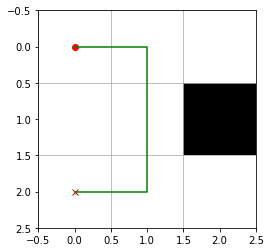

In [48]:
''' alright, with an adjancency list now created, will iterate through each 
    node (number) '''
# grid 3
grid = np.ones((3,3))
grid[1,2]=0
loc_start = [0,0]
loc_end   = [2,0]
st = coord2cellnum(loc_start,3)
en = coord2cellnum(loc_end,3)

path = dfs(adj,st,en)[1]
print(path)

coords=np.array(path2coords(path,grid.shape[1]))
x=coords[:,1]
y=coords[:,0]
f,p=plotgrid(grid)

p.plot(*loc_start[::-1],'ro')
p.plot(*loc_end[::-1],'rx')
p.plot(x,y,'g-')


In [5]:
dir()

['In',
 'Out',
 '_',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'adj',
 'canGoInDir',
 'cellnum2coord',
 'coord2cellnum',
 'coords',
 'dfs',
 'exit',
 'f',
 'get_ipython',
 'grid',
 'ikey',
 'loc_end',
 'loc_start',
 'makeAdjList',
 'np',
 'p',
 'path',
 'path2coords',
 'plotgrid',
 'plt',
 'quit',
 'rundfs',
 'x',
 'y']

In [6]:
f.cl

AttributeError: 'Figure' object has no attribute 'cl'

In [ ]:
a=[]
len(a)

In [ ]:
# before figuring things out, make a tree from all the paths
# start with loc_start...

class MakePoint:
    def __init__(self,dirlist):
        self.up=dirlist[0]
        self.right=dirlist[1]
        self.down=dirlist[2]
        self.left=dirlist[3]
        self.dirs = dirlist

def makeTreeGrid(arr):
    tree = np.zeros(arr.shape).astype(object)
    for i,irow in enumerate(arr):
        for j,jcol in enumerate(irow): 
            if(arr[i,j]!=0):
                # grid spot is not occupied
                dirs=[canGoInDir(arr,[i,j],idir) for idir in range(4)]
                tree[i,j] = MakePoint(dirs)
    return tree
#                 print('Location ',(i,j))
#                 for idir in range(4):
#                     print('  dir {}: {}'.format(idir,canGoInDir(grid,[i,j],idir)))
tree = makeTreeGrid(grid)
for i,irow in enumerate(tree):
    for j,jcol in enumerate(irow):
        if(tree[i,j]!=0):
            print('Location {}: {}'.format((i,j),(tree[i,j].dirs)) )


In [ ]:
''' at this point, try to get to goal by taking path '''

In [ ]:
# class MakeTreeGrid:
#     def __init__(self,array):
        

# for i,irow in enumerate(grid):
#     for j,jcol in enumerate(irow): 
#         if(grid[i,j]!=0):
#             # grid spot is empty
#             print('Location ',(i,j))
#             for idir in range(4):
#                 print('  dir {}: {}'.format(idir,canGoInDir(grid,[i,j],idir)))
# DO NOT DELETE YET
# x=np.linspace(0,3)
# y=x**2/3
# p.plot(x,y,'r')
# f # calling it seems to refresh everything in jupyter notebook